In [111]:
import numpy as np
import matplotlib.ticker as mtick


In [85]:
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns
import pandas as pd

In [2]:

def load_data():
    '''

    https://www.kaggle.com/datasets/rohitudageri/credit-card-details

    Birthday_count: 
    Use backward count from current day (0), -1 means yesterday.
    
    Employed_days: 
    Start date of employment. 
    Use backward count from current day (0). 
    Positive value means, individual is currently unemployed. -> maybe separate to a binary employed column?

    '''
    data = pd.read_csv('credit_card.csv')
    data = data.drop(['Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis=1)
    #data = data.drop([ 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis=1)
    
    return data
    
data = load_data()
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2


In [3]:
# Display the first few rows of the dataset

# Get the number of rows and columns
print(data.shape)

# Get summary statistics
print(data.describe())


(1548, 13)
          CHILDREN  Annual_income  Birthday_count  Employed_days  \
count  1548.000000   1.525000e+03     1526.000000    1548.000000   
mean      0.412791   1.913993e+05   -16040.342071   59364.689922   
std       0.776691   1.132530e+05     4229.503202  137808.062701   
min       0.000000   3.375000e+04   -24946.000000  -14887.000000   
25%       0.000000   1.215000e+05   -19553.000000   -3174.500000   
50%       0.000000   1.665000e+05   -15661.500000   -1565.000000   
75%       1.000000   2.250000e+05   -12417.000000    -431.750000   
max      14.000000   1.575000e+06    -7705.000000  365243.000000   

       Family_Members  
count     1548.000000  
mean         2.161499  
std          0.947772  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Birthday_count   1526 non-null   float64
 10  Employed_days    1548 non-null   int64  
 11  Type_Occupation  1060 non-null   object 
 12  Family_Members   1548 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 157.3+ KB


In [5]:
data.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
dtype: int64

In [8]:
def join_label():
    # Read the second CSV file
    label = pd.read_csv('credit_card_label.csv')
    label = label.drop(['Ind_ID'], axis=1)
    # Concatenate the two dataframes along the appropriate axis (e.g., axis=1 for column-wise concatenation)
    return pd.concat([data, label], axis=1)

data_labeled = join_label()
data_labeled

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2,0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,0


In [92]:
def aproval_by(column):
    plt.figure() 
    #print(data_labeled)
    #sns.set(style="whitegrid")
    sns.histplot(data=data_labeled, x=column, hue='label', multiple='stack')
    percentage_approval = data_labeled.groupby(column)['label'].mean() * 100
    formatted_percentages = percentage_approval.round(2).astype(str) + '%'
    plt.show() 
    #print(formatted_percentages)
    print(data[column].value_counts())

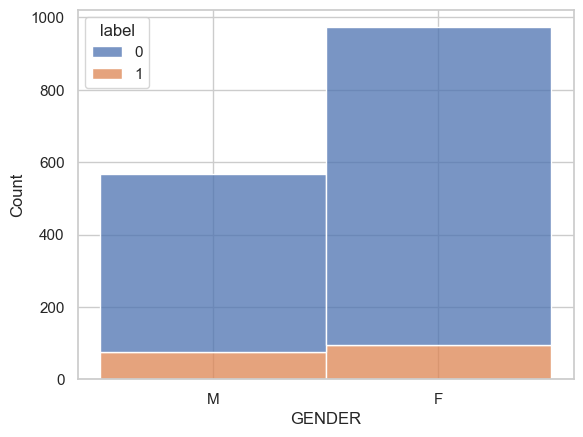

GENDER
F    973
M    568
Name: count, dtype: int64


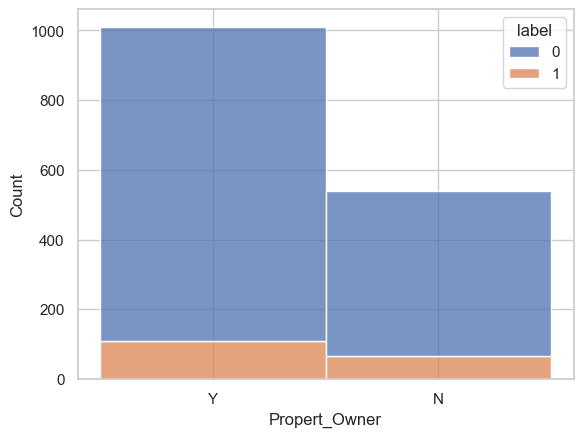

Propert_Owner
Y    1010
N     538
Name: count, dtype: int64


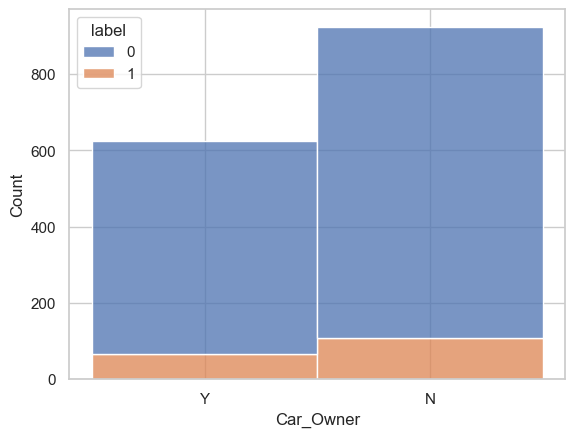

Car_Owner
N    924
Y    624
Name: count, dtype: int64


In [93]:
aproval_by('GENDER')
aproval_by('Propert_Owner')
aproval_by('Car_Owner')

CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64


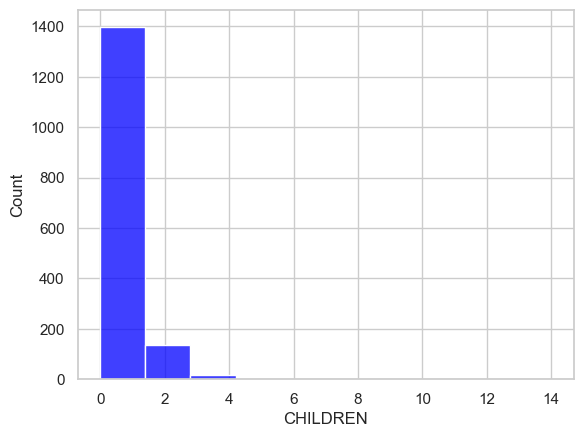

In [104]:
def children():
    print(data['CHILDREN'].value_counts())
    sns.histplot(data=data_labeled, x='CHILDREN', kde=False, color='blue', bins=10)
    plt.show()

children()    

count     1525
mean     $191K
std      $113K
min       $33K
25%      $121K
50%      $166K
75%      $225K
max      $1.6M
Name: Annual_income, dtype: object
33750.0


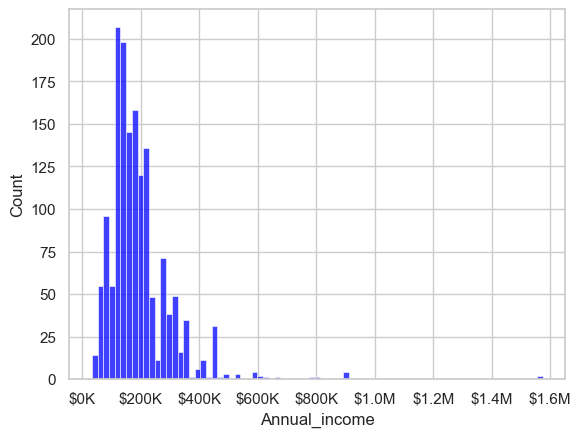

In [136]:
# Format the x-axis tick labels to represent values dynamically in K or M
def custom_formatter(x, pos):
    if x >= 1000000:
        return f'${x/1000000:.1f}M'
    else:
        return f'${int(x / 1000)}K'


def custom_formatter_describe(x):
    if x >= 1000000:
        return f'${x/1000000:.1f}M'
    else:
        return f'${int(x / 1000)}K'

def annual_income():
    description = data['Annual_income'].describe()
    formatted_description = description.apply(custom_formatter_describe)
    formatted_description['count'] = description['count'].astype(int)
    print(formatted_description)

    custom_bins = np.linspace(data['Annual_income'].min(), data['Annual_income'].max(), 80)
    #custom_bins = [0, 25_000, 50_000, 75_000, 100_000, 125_000, 200_000, 500_000, 1_000_000]
    ax = sns.histplot(data=data_labeled, x='Annual_income', color='blue', bins=custom_bins)
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))
    plt.show()

annual_income()    

In [162]:

def hist_by(column):
    plt.figure()
    color_palette = "Set3"
    sns.histplot(data=data_labeled, x=column, discrete=True, stat='count', palette=color_palette, hue=data_labeled[column])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
    print(data_labeled[column].describe())
    data_labeled[column].value_counts()


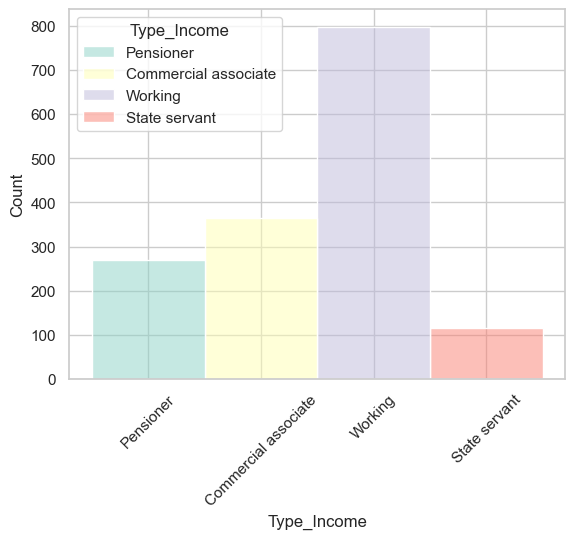

count        1548
unique          4
top       Working
freq          798
Name: Type_Income, dtype: object


In [163]:
hist_by('Type_Income')

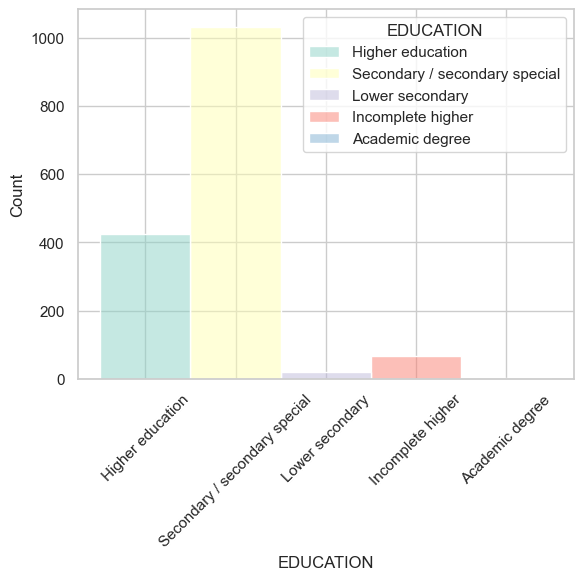

count                              1548
unique                                5
top       Secondary / secondary special
freq                               1031
Name: EDUCATION, dtype: object


In [164]:
hist_by('EDUCATION')

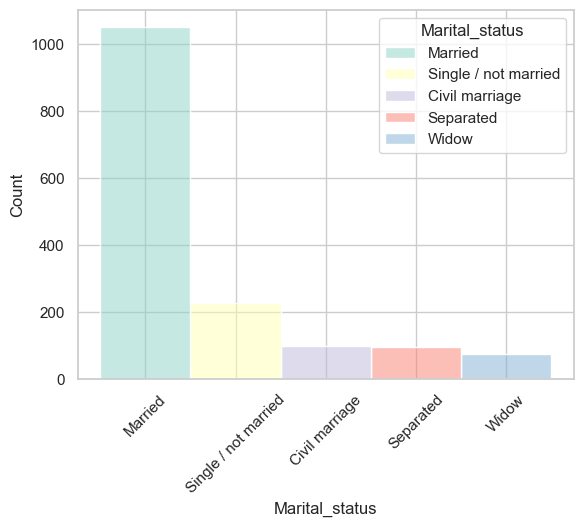

count        1548
unique          5
top       Married
freq         1049
Name: Marital_status, dtype: object


In [165]:
hist_by('Marital_status')

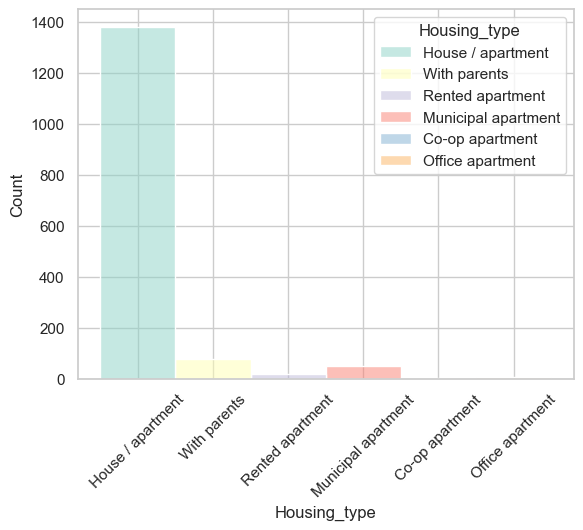

count                  1548
unique                    6
top       House / apartment
freq                   1380
Name: Housing_type, dtype: object


In [166]:
hist_by('Housing_type')

Percent of missing "Type_Occupation" records is 31.52%


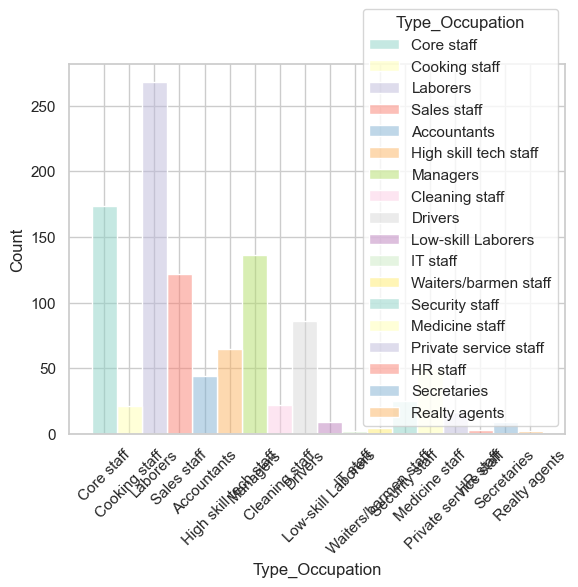

count         1060
unique          18
top       Laborers
freq           268
Name: Type_Occupation, dtype: object


In [174]:
# percent of missing "Type_Occupation" 
print('Percent of missing "Type_Occupation" records is %.2f%%' %((data['Type_Occupation'].isnull().sum()/data.shape[0])*100))
hist_by('Type_Occupation')